# Categorical Naive Bayes

In [35]:

import numpy as np
from pathlib import Path
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from src.models import CategoricalNaiveBayes
from src.utils import train_test_split, classification_report
from src.visualization import ModelVisualizer

# Data Prep

## Read data

In [36]:
data_path = Path().resolve().parent / Path("data/processed/processed_train.csv")

# Read first line as header
with open(data_path, "r", encoding="utf-8") as f:
    data_header = f.readline().strip().split(",")

data = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str)
data[:5]

array([['city_103', 'Male', 'Has relevent experience', 'no_enrollment',
        'Graduate', 'STEM', '>20', 'Missing', 'Missing', '1', '1.0'],
       ['city_40', 'Male', 'No relevent experience', 'no_enrollment',
        'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '0.0'],
       ['city_21', 'Missing', 'No relevent experience',
        'Full time course', 'Graduate', 'STEM', '5', 'Missing',
        'Missing', 'never', '0.0'],
       ['city_115', 'Missing', 'No relevent experience', 'no_enrollment',
        'Graduate', 'Business Degree', '<1', 'Missing', 'Pvt Ltd',
        'never', '1.0'],
       ['city_162', 'Male', 'Has relevent experience', 'no_enrollment',
        'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4', '0.0']],
      dtype='<U23')

## Split data

80% train, 20% val

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.2, random_state=42
)

# Modeling

In [38]:
model = CategoricalNaiveBayes()
model.fit(X_train, y_train)

In [39]:
y_pred = model.predict(X_val)

## Evaluation

In [40]:
report = classification_report(y_val, y_pred)

Class 0.0: Precision: 0.7463, Recall: 0.7302, F1-Score: 0.7381
Class 1.0: Precision: 0.7359, Recall: 0.7517, F1-Score: 0.7437
Overall Accuracy: 0.7410


In [41]:
confusion_matrix = np.zeros((2, 2), dtype=int)
for true_label, pred_label in zip(y_val, y_pred):
    true_label = int(float(true_label))
    pred_label = int(float(pred_label))
    confusion_matrix[true_label, pred_label] += 1
class_names = ["No Job Change", "Job Change"]

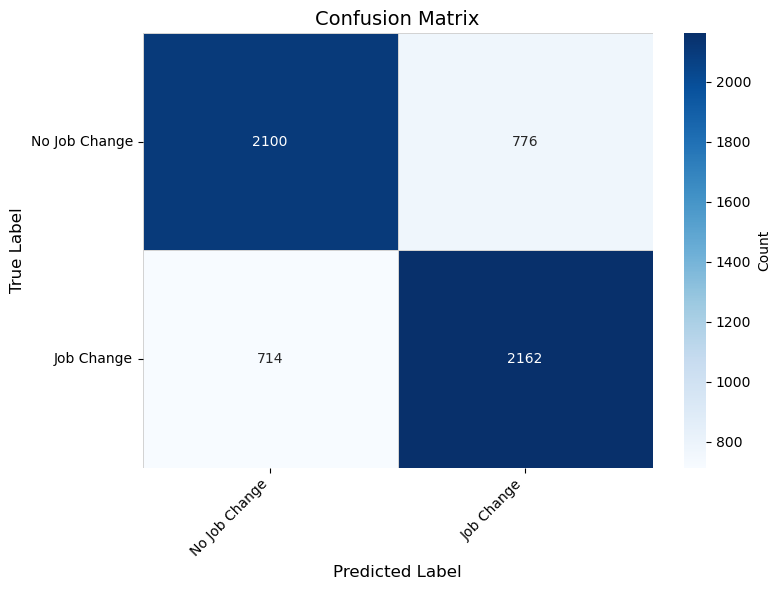

In [42]:
ModelVisualizer.plot_confusion_matrix(confusion_matrix, class_names)

Observe confusion matrix and classification report:

- The Categorical Naive Bayes model achieves a good balance between precision and recall for both classes.
- But the overall accuracy is moderate, indicating room for improvement.

## Predict test set

In [43]:
data_path = Path().resolve().parent / Path("data/processed/processed_test.csv")

# Read first line as header
with open(data_path, "r", encoding="utf-8") as f:
    data_header = f.readline().strip().split(",")

data = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str)
data[:5]

array([['32403', 'city_41', 'Male', 'Has relevent experience',
        'Full time course', 'Graduate', 'STEM', '9', '<10', 'Missing',
        '1'],
       ['9858', 'city_103', 'Female', 'Has relevent experience',
        'no_enrollment', 'Graduate', 'STEM', '5', 'Missing', 'Pvt Ltd',
        '1'],
       ['31806', 'city_21', 'Male', 'No relevent experience',
        'no_enrollment', 'High School', 'STEM', '<1', 'Missing',
        'Pvt Ltd', 'never'],
       ['27385', 'city_13', 'Male', 'Has relevent experience',
        'no_enrollment', 'Masters', 'STEM', '11', '10/49', 'Pvt Ltd',
        '1'],
       ['27724', 'city_103', 'Male', 'Has relevent experience',
        'no_enrollment', 'Graduate', 'STEM', '>20', '10000+', 'Pvt Ltd',
        '>4']], dtype='<U23')

In [44]:
# save enrollee ids for submission
enrollee_ids = data[:, data_header.index("enrollee_id")]
X_test = data[:, :-1]
y_test_pred = model.predict(X_test)

In [45]:
# save predictions to csv file
submission_path = Path().resolve().parent / Path("data/processed/submission.csv")
with open(submission_path, "w", encoding="utf-8") as f:
    f.write("enrollee_id,job_change\n")
    for enrollee_id, pred in zip(enrollee_ids, y_test_pred):
        f.write(f"{enrollee_id},{pred}\n")